In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
class SyntheticNeuralData:

    def __init__(self, num_neurons, g, tau, dt, time_steps):
        self.num_neurons = num_neurons
        self.g = g
        self.tau = tau
        self.dt = dt
        self.time_steps = time_steps

        self.J = self.genMatrixJ()
        self.hC = self.initRandomState()
        self.h, self.time = self.genSyntheticData()

    def genMatrixJ(self):
        J = np.random.randn(self.num_neurons, self.num_neurons)
        J = self.g / np.sqrt(self.num_neurons) * J
        np.fill_diagonal(J, 0)
        return J

    def initRandomState(self):
        hC = 2 * np.random.rand(self.num_neurons, 1) - 1
        return hC

    def genSyntheticData(self):
        # Initialize the array to store the data
        h = np.zeros((self.time_steps, self.hC.size))

        # Initialize the first entry (initial conditions)
        h[0, :] = self.hC.squeeze()

        # Iterate over the time steps
        for t in tqdm(range(1, self.time_steps)):
            # Actual time step
            h_t = h[t-1, :]
            # Compute the fire rate
            fr_t = np.tanh(h_t)
            # Weight by the connectivity matrix
            fr_t = self.J @ fr_t
            # Compute the next time step
            h[t, :] = h_t + self.dt * (-h_t + fr_t) / self.tau

        # Time vector
        time = np.arange(0, self.time_steps * self.dt, self.dt)

        return h, time
    
    def plotMAtrixJ(self):
        plt.imshow(self.J, cmap='seismic')
        plt.title('Connectivity Matrix')
        plt.colorbar()
        plt.axis('off')
        plt.show()

    def plotSyntheticData(self, n):
        assert n < self.num_neurons, 'n must be less than the number of neurons'

        for i in range(n):
            plt.plot(self.time, self.h[:, np.random.randint(0, self.num_neurons)])

        plt.title('Synthetic Data')
        plt.xlabel('Time')
        plt.ylabel('Activity')
        plt.tight_layout()
        plt.show()

    def saveData(self, path='synthetic_data.npz'):
        np.savez(path, J=self.J, h=self.h, time=self.time)

100%|██████████| 10796/10796 [00:00<00:00, 11772.86it/s]


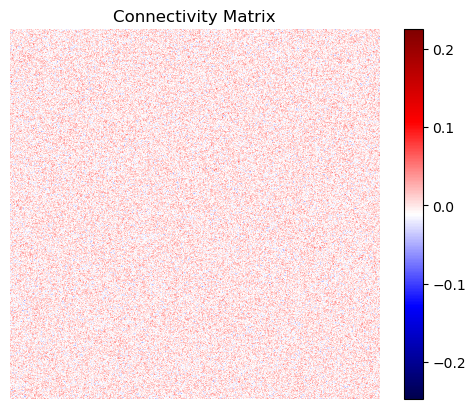

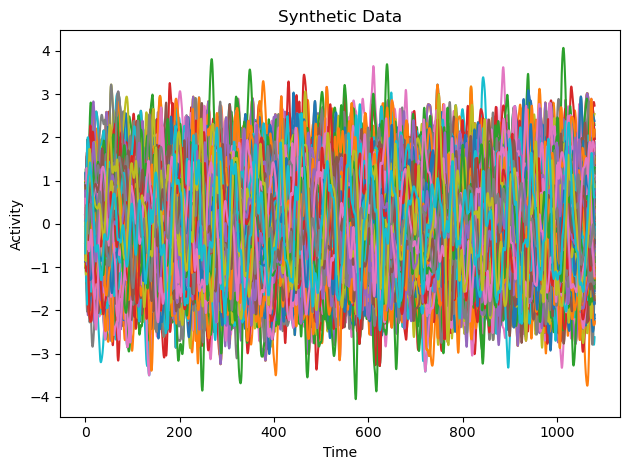

In [27]:
# Number of neurons
num_neurons = 1000

# Connectivity matrix
g = 1.5

# Time parameters
tau = 1
dt = 0.1
time_steps = 10797

data = SyntheticNeuralData(num_neurons, g, tau, dt, time_steps)
data.plotMAtrixJ()
data.plotSyntheticData(num_neurons//2)

In [28]:
data.saveData()